<a href="https://colab.research.google.com/github/Tkag0001/Practice_NLP_with_transformer/blob/main/Text_classification_chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The dataset

In [1]:
!pip install datasets

In [2]:
from datasets import list_datasets

In [3]:
all_datasets = list_datasets()
print(f"Number of datasets: {len(all_datasets)}")
print(f"The first 5 datasets: {all_datasets[:5]}")

<ipython-input-3-5b6334ded836>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Number of datasets: 166038
The first 5 datasets: ['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus']


In [4]:
from datasets import load_dataset

In [5]:
emotions = load_dataset("emotion")

In [6]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [9]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [10]:
print(train_ds.column_names)

['text', 'label']


In [11]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [12]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

###(Optional) We can load dataset from url or private file

In [13]:
# dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
# !wget {dataset_url}

(Optional) Then use function to load with separate charater

In [14]:
# emotions_local = load_dataset("csv", data_files="train.txt",
#                               delimiter=";", names=["text", "label"])

Or we can input url of dataset to function

In [15]:
# emotions_remote = load_dataset("csv", data_files=dataset_url,
#                               delimiter=";", names=["text", "label"])

##From datasets to dataframes

In [16]:
import pandas as pd

In [17]:
emotions.set_format(type="pandas")
df = emotions["train"][:]

In [18]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [19]:
#Convert number label to str label
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

In [20]:
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [21]:
import matplotlib.pyplot as plt

In [22]:
label_name_counts = df["label_name"].value_counts(ascending=True)
label_name_counts

label_name
surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: count, dtype: int64

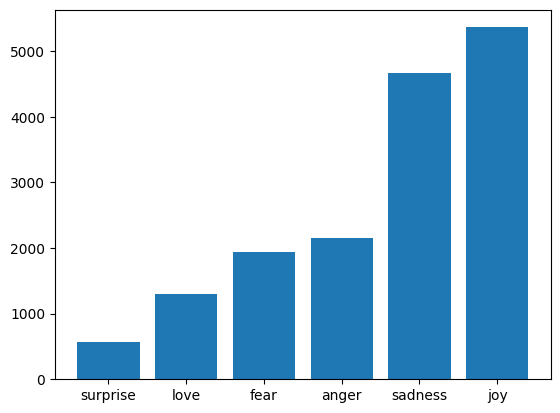

In [23]:
plt.bar(label_name_counts.index, label_name_counts)
plt.show()

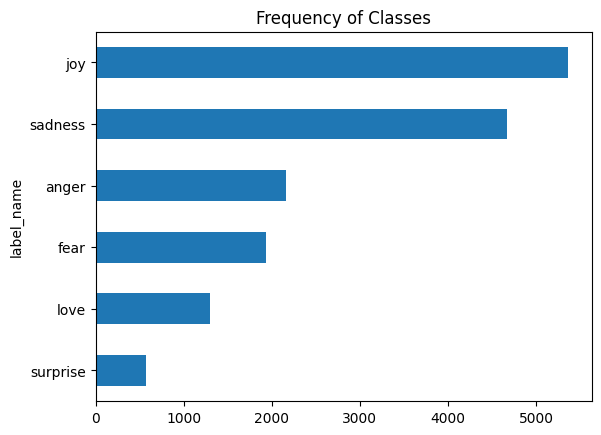

In [24]:
#Another method to plot
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

##How long are our tweets

In [25]:
df["words per tweet"] = df["text"].str.split().apply(len)

In [26]:
df.head()

,text,label,label_name,words per tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


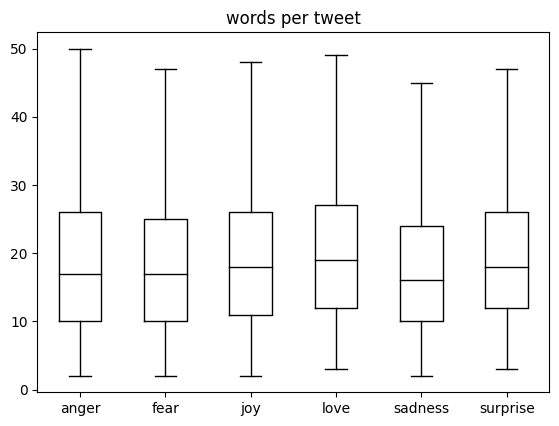

In [27]:
df.boxplot("words per tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [28]:
type(emotions)

datasets.dataset_dict.DatasetDict

In [29]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [30]:
#reset to original format
emotions.reset_format()

#Tokenize

##Character tokenize

In [31]:
text = "Tokenizing text is a core task of NLP."

In [32]:
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [33]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [34]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [35]:
categorical_df=pd.DataFrame(
    {"Name": ["Khang", "Duy", "Dung"],
     "Label ID": [0,1,2]}
)
categorical_df.head()

,Name,Label ID
0,Khang,0
1,Duy,1
2,Dung,2


In [36]:
pd.get_dummies(categorical_df)

,Label ID,Name_Dung,Name_Duy,Name_Khang
0,0,False,False,True
1,1,False,True,False
2,2,True,False,False


In [37]:
import torch

In [38]:
import torch.nn.functional as F

In [39]:
input_ids = torch.tensor(input_ids)
print(input_ids)

tensor([ 5, 14, 12,  8, 13, 11, 19, 11, 13, 10,  0, 17,  8, 18, 17,  0, 11, 16,
         0,  6,  0,  7, 14, 15,  8,  0, 17,  6, 16, 12,  0, 14,  9,  0,  3,  2,
         4,  1])


In [40]:
one_hot_encoding = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encoding

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0,

In [41]:
one_hot_encoding.shape

torch.Size([38, 20])

We can implement this method above to another types of tokenization

In [42]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encoding[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


##Word tokenization

In [43]:
tokenized_text = text.split()

In [44]:
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [45]:
word_tokenizer = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(word_tokenizer)

{'NLP.': 0, 'Tokenizing': 1, 'a': 2, 'core': 3, 'is': 4, 'of': 5, 'task': 6, 'text': 7}


In [46]:
word_tokenized_text = [word_tokenizer[word] for word in tokenized_text]
print(word_tokenized_text)

[1, 7, 4, 2, 3, 6, 5, 0]


In [47]:
input_ids = torch.tensor(word_tokenized_text)
print(input_ids)

tensor([1, 7, 4, 2, 3, 6, 5, 0])


In [48]:
word_one_hot_encoding = F.one_hot(input_ids, num_classes = len(word_tokenizer))
word_one_hot_encoding.shape

torch.Size([8, 8])

##Subword tokenization

In [49]:
from transformers import AutoTokenizer

In [50]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [51]:
from transformers import DistilBertTokenizer

In [52]:
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [53]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [54]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [55]:
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [56]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [57]:
tokenizer.vocab_size

30522

In [58]:
tokenizer.model_max_length

512

In [59]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

##Tokenizing the whole dataset

In [60]:
def tokenize(batch):
  return tokenizer(batch["text"], padding = True, truncation = True)

In [61]:
tokenize(emotions["train"][:5])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0], [101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}

In [62]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [63]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


#Training a text classifier

##Transformers as Feature Extractors

###Using pretrained model

In [64]:
 emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [65]:
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [66]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

###(Optional) Interoperability between framework

In [67]:
model_ckpt

'distilbert-base-uncased'

In [68]:
#This code only use for model is built on tensorflow
from transformers import TFAutoModel
tf_model = TFAutoModel.from_pretrained(model_ckpt)
tf_model

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [69]:
#If you use for the model is only built on pytorch, it will get an error
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [70]:
#But we can set parameter "from_pt" = True to auto convert
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


###Extracting the last hidden states

In [71]:
text = "This is a test"
inputs = tokenizer(text, return_tensors = "pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [72]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [73]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])

In [74]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [75]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [76]:
outputs.last_hidden_state

tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0')

In [77]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [78]:
emotions_encoded.set_format("torch", columns = ["input_ids", "attention_mask", "label"])

In [79]:
emotions_encoded["train"][0]

{'label': tensor(0),
 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0

In [80]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched = True)

In [81]:
emotions_hidden["train"][0]

{'label': tensor(0),
 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0

In [82]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

###Creating a feature matrix

In [83]:
import numpy as np

In [84]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [85]:
X_train[0]

array([-1.16751298e-01,  9.85713750e-02, -1.29628971e-01, -9.50178057e-02,
       -2.80833960e-01, -1.32215217e-01,  2.27481365e-01,  2.31003672e-01,
        1.67522460e-01, -2.46625900e-01,  2.17550397e-02, -1.02000095e-01,
       -1.80978820e-01,  2.23511204e-01,  2.02753171e-01,  1.16930343e-01,
       -6.95537485e-04,  1.20253444e-01, -1.42199977e-04, -6.07427023e-02,
       -1.43815830e-01, -3.12014014e-01, -1.08771987e-01,  1.18215427e-01,
       -7.39389136e-02,  7.26349801e-02,  2.13192269e-01, -2.95695662e-01,
        1.04322657e-01, -1.49795413e-01,  1.19126916e-01,  1.35585994e-01,
       -2.05119014e-01,  7.99828693e-02, -1.23400316e-01,  2.49952041e-02,
        1.19480370e-02,  1.00903073e-02,  1.37400120e-01, -1.34402653e-02,
       -1.12659492e-01, -7.76466280e-02, -1.30066454e-01, -7.16875345e-02,
        8.52973312e-02, -5.47501668e-02, -2.18809605e+00, -5.04678376e-02,
       -3.22110206e-01, -1.62445039e-01,  3.16996634e-01, -1.95754588e-01,
        1.32156357e-01,  

###Visualizing the training set

In [86]:
!pip install umap-learn

In [87]:
#We use UMAP algorithm to the vectors down to 2D
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

#Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
#Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
#Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.170841,6.242577,0
1,-2.983071,5.760657,0
2,5.056818,2.651224,3
3,-2.550951,3.581437,2
4,-3.429993,3.737771,3


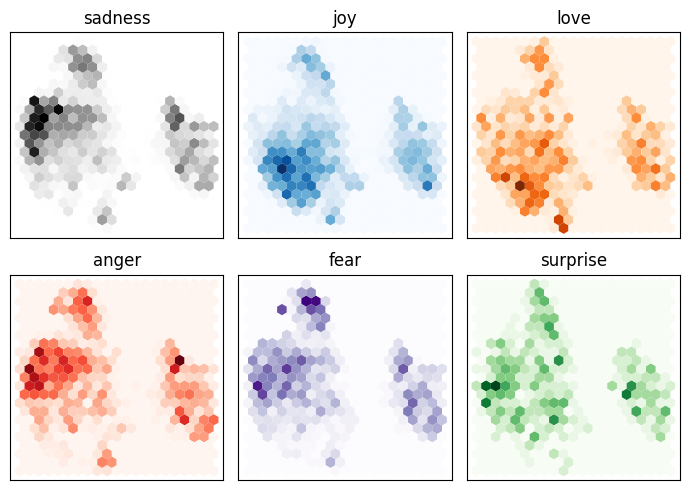

In [88]:
fig, axes = plt.subplots(2,3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label,cmap) in enumerate(zip(labels,cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap = cmap, gridsize = 20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [89]:
X_train

array([[-0.1167513 ,  0.09857138, -0.12962897, ...,  0.0587108 ,
         0.35432693,  0.4042067 ],
       [-0.03236292, -0.03231524, -0.19572599, ..., -0.17465737,
         0.35463768,  0.30276582],
       [ 0.03974647,  0.2022336 ,  0.14227113, ..., -0.11406833,
         0.33937776,  0.395831  ],
       ...,
       [-0.00339847, -0.09585506,  0.05843544, ..., -0.04272703,
         0.2495916 ,  0.30761623],
       [ 0.06660261,  0.17334324,  0.12896673, ...,  0.06118569,
         0.29038215,  0.46844164],
       [ 0.01668789,  0.10127088, -0.00731721, ..., -0.06493651,
         0.34540522,  0.21993564]], dtype=float32)

In [90]:
y_train

array([0, 0, 3, ..., 1, 3, 0])

###Training a simple classifier

In [91]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=3000)
lr_model.fit(X_train, y_train)
lr_model.score(X_valid, y_valid)

0.6335

In [92]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_model.score(X_valid, y_valid)

0.352

In [93]:
# Investigate the performance of model
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [94]:
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_preds, y_true, normalize = "true")
  fig, ax = plt.subplots(figsize = (8,8))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
  disp.plot(cmap="Reds", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

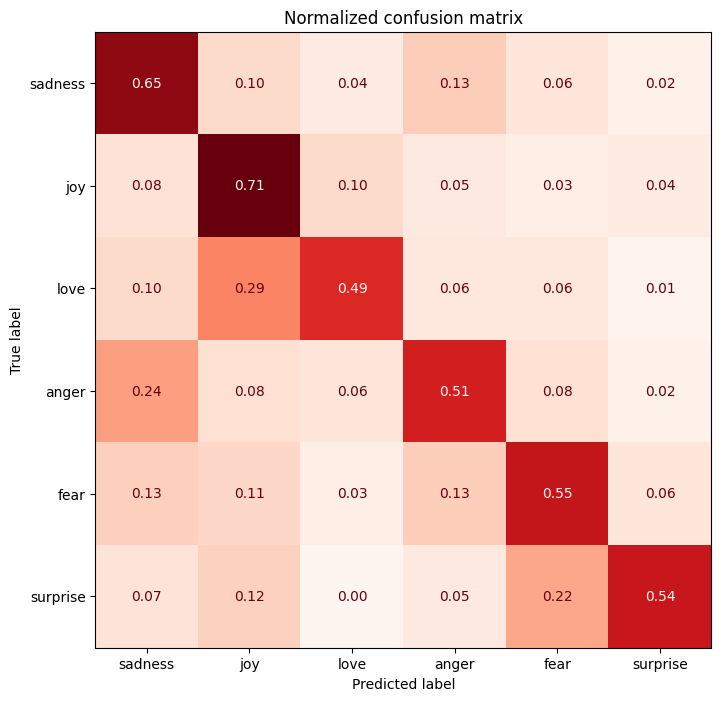

In [95]:
y_preds = lr_model.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

##Fine-tuning transformers
Fine-tune a transformer end-to-end

###Loading a pretrained model

In [96]:
from transformers import AutoModelForSequenceClassification

In [97]:
num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [98]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

###Defining the performance metrics

In [99]:
from sklearn.metrics import accuracy_score, f1_score

In [100]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

###Training the model

In [101]:
from huggingface_hub import notebook_login

In [102]:
notebook_login()
#if you're working in terminal, use this script
#$ huggingface-cli login

In [103]:
!pip install transformers[torch]

In [104]:
!pip install accelerate -U

In [105]:
from transformers import Trainer, TrainingArguments

In [106]:
import accelerate

In [110]:
batch_size = 64
logging_steps = len(emotions_encoded["train"])
model_name = f"{model_ckpt}-findtuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [160]:
emotions_encoded["train"]["label"]

tensor([0, 0, 3,  ..., 1, 3, 0])

In [111]:
from transformers import Trainer

In [113]:
trainer = Trainer(model = model, args = training_args,
                  compute_metrics = compute_metrics,
                  train_dataset = emotions_encoded["train"],
                  eval_dataset = emotions_encoded["validation"],
                  tokenizer = tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.309203,0.908500,0.907922
2,No log,0.215183,0.925000,0.925197


TrainOutput(global_step=500, training_loss=0.5315878295898437, metrics={'train_runtime': 241.9274, 'train_samples_per_second': 132.271, 'train_steps_per_second': 2.067, 'total_flos': 720342861696000.0, 'train_loss': 0.5315878295898437, 'epoch': 2.0})

In [114]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [115]:
preds_output

PredictionOutput(predictions=array([[ 4.5936832 , -0.5296006 , -1.1279557 , -0.7773871 , -0.70431846,
        -1.8381839 ],
       [ 4.54367   , -0.678997  , -1.5828285 , -0.3879848 , -0.40512034,
        -1.763119  ],
       [-0.84742075,  2.2733474 ,  3.1145656 , -1.019367  , -1.6964309 ,
        -1.3767092 ],
       ...,
       [-0.6656525 ,  4.6498156 ,  0.70564824, -0.90365595, -1.0922998 ,
        -1.3500853 ],
       [-1.1945227 ,  2.6912463 ,  2.9880884 , -1.1792154 , -1.5434332 ,
        -1.0223291 ],
       [-1.295835  ,  4.6264424 ,  0.7863951 , -1.1576045 , -1.1385678 ,
        -0.2596213 ]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.21518319845199585, 'test_accuracy': 0.925, 'test_f1': 0.9251965676288524, 'test_runtime': 4.7304, 'test_samples_per_second': 422.793, 'test_steps_per_second': 6.765})

In [116]:
preds_output.metrics

{'test_loss': 0.21518319845199585,
 'test_accuracy': 0.925,
 'test_f1': 0.9251965676288524,
 'test_runtime': 4.7304,
 'test_samples_per_second': 422.793,
 'test_steps_per_second': 6.765}

We can get predictions with 2 methods

In [122]:
y_preds = np.argmax(preds_output.predictions, axis = 1)

In [123]:
y_preds[:5]

array([0, 0, 2, 3, 1])

In [124]:
y_preds_1 = preds_output.label_ids

In [125]:
y_preds_1[:5]

array([0, 0, 2, 3, 1])

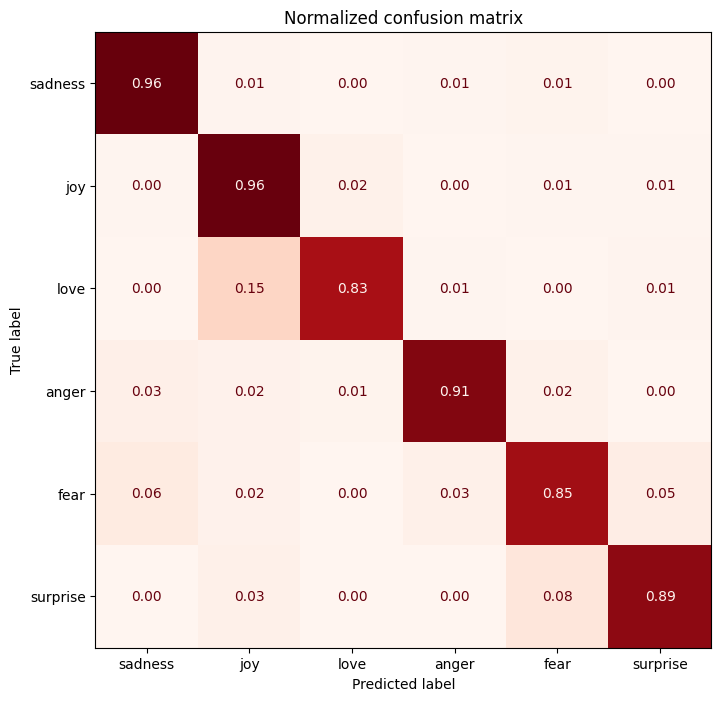

In [126]:
plot_confusion_matrix(y_preds, y_valid, labels)

###(Optional) this method above use pytorch, we can fine-tuning in tensorflow project with keras api

In [127]:
from transformers import TFAutoModelForSequenceClassification

In [128]:
tf_model = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels))

In [133]:
#convert datasets to tf.data.Dataset.format
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded["train"].to_tf_dataset(columns = tokenizer_columns,
                                                           label_cols = ["label"],
                                                           shuffle = False,
                                                           batch_size = batch_size)

tf_eval_dataset = emotions_encoded["validation"].to_tf_dataset(columns = tokenizer_columns,
                                                               label_cols = ["label"],
                                                               shuffle = False,
                                                               batch_size = batch_size)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:410: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [132]:
tf_train_dataset

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 87), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 87), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [134]:
tf_eval_dataset

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 69), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 69), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [143]:
import tensorflow as tf
tf_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 2e-5),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  metrics = tf.metrics.SparseCategoricalAccuracy())

tf_model.fit(tf_train_dataset, validation_data = tf_eval_dataset, epochs = 2)

Epoch 1/2


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 192s 572ms/step - loss: 0.7546 - sparse_categorical_accuracy: 0.7408 - val_loss: 0.2274 - val_sparse_categorical_accuracy: 0.9220
Epoch 2/2
250/250 [==============================] - 137s 546ms/step - loss: 0.1835 - sparse_categorical_accuracy: 0.9324 - val_loss: 0.1654 - val_sparse_categorical_accuracy: 0.9310


In [144]:
preds_tf = tf_model.predict(tf_eval_dataset)

32/32 [==============================] - 8s 151ms/step


In [162]:
preds_tf_labels = np.argmax(preds_tf.logits, axis = 1)

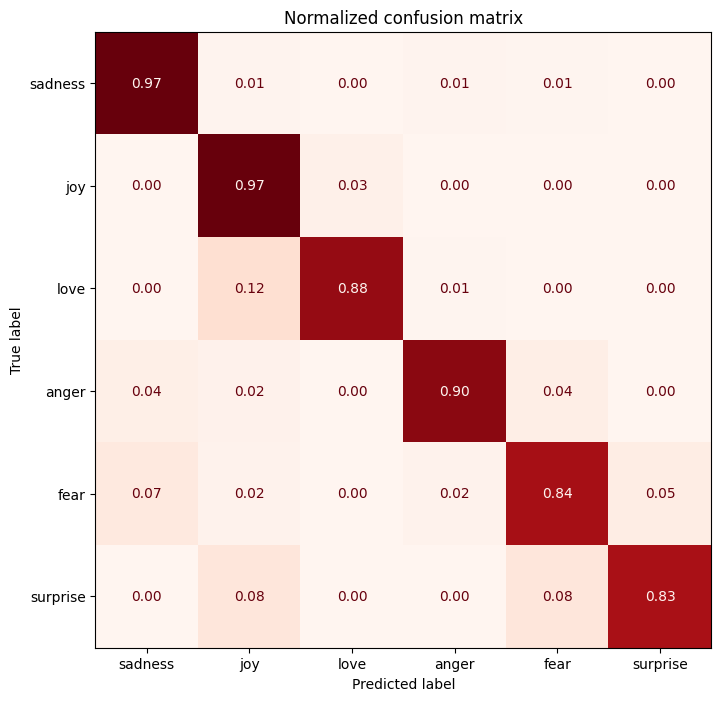

In [166]:
plot_confusion_matrix(preds_tf_labels, y_valid, labels)

###Error analysis

In [167]:
from torch.nn.functional import cross_entropy

In [180]:
def forward_pass_with_label(batch):
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device), reduction="none")
  return {"loss": loss.cpu().numpy(),
          "predicted_label": pred_label.cpu().numpy()}

In [171]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [176]:
#convert dataset to Pytorch tensors
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [175]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [181]:
#comput_loss_values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [185]:
emotions_encoded["validation"][0]

{'label': tensor(0),
 'input_ids': tensor([  101, 10047,  3110,  3243,  6517,  1998,  3374,  2005,  2870,  2021,
          5665, 10245,  2041,  1997,  2009,  2574,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'loss': tensor(0.0203),
 'predicted_label': tensor(0)}

In [190]:
#Create dataframe
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [191]:
df_test.head()

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.020284
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.023431
2,i feel like a faithful servant,love,love,0.395803
3,i am just feeling cranky and blue,anger,anger,0.034616
4,i can have for a treat or if i am feeling festive,joy,joy,0.019788


In [195]:
pd.set_option('display.max_colwidth', None)

In [196]:
display(df_test.sort_values("loss", ascending=False).head(10))

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong with corporate america and feel that sending him to washington is a ludicrous idea,surprise,sadness,5.890255
1963,i called myself pro life and voted for perry without knowing this information i would feel betrayed but moreover i would feel that i had betrayed god by supporting a man who mandated a barely year old vaccine for little girls putting them in danger to financially support people close to him,joy,sadness,5.472723
1274,i am going to several holiday parties and i can t wait to feel super awkward i am going to several holiday parties and i can t wait to feel super awkward a href http badplaydate,joy,sadness,5.197883
882,i feel badly about reneging on my commitment to bring donuts to the faithful at holy family catholic church in columbus ohio,love,sadness,5.188780
1801,i feel that he was being overshadowed by the supporting characters,love,sadness,5.170704
1870,i guess i feel betrayed because i admired him so much and for someone to do this to his wife and kids just goes beyond the pale,joy,sadness,5.107625
765,i feel super awkward and out of place right now,joy,sadness,5.042986
1111,im lazy my characters fall into categories of smug and or blas people and their foils people who feel inconvenienced by smug and or blas people,joy,fear,4.970483
1500,i guess we would naturally feel a sense of loneliness even the people who said unkind things to you might be missed,anger,sadness,4.959649
465,i would eventually go in to these stores but i had to work up a lot of courage and i would still feel super uncomfortable once inside which we all know is not normal for me,joy,fear,4.901827
